<h1><font color="orange"><b>Prediction of academic success</b></font></h1>

In [4]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
pip uninstall scikit-learn -y

In [ ]:
pip install scikit-learn==1.3.2

In [ ]:
print(sklearn.__version__)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("student_performance_dataset.csv")

In [3]:
data

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


In [ ]:
df = data.dropna()

In [ ]:
df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


In [ ]:
target_col = 'Pass_Fail'
exp_cols = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores']

In [ ]:
X = data[exp_cols]
y = data[target_col]

In [ ]:
pip install choquet-classifier-glenscalai

In [ ]:
from choquet_classifier_glenscalai.choquet_classifier import ChoquetClassifier

In [ ]:
cc = ChoquetClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y)

In [ ]:
cc.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


`xtol` termination condition is satisfied.
Number of iterations: 134, function evaluations: 1197, CG iterations: 376, optimality: 1.19e-05, constraint violation: 0.00e+00, execution time: 3.8e+01 s.


ChoquetClassifier()

In [ ]:
cc.mediator_.scaling

16.49731396297901

In [ ]:
cc.mediator_.threshold

0.4892393924657038

In [ ]:
cc.mediator_.moebius_transform

{frozenset({1}): 0.2800163581916921,
 frozenset({2}): 0.3218553941478814,
 frozenset({3}): 0.3383169897827868,
 frozenset({1, 2}): 1.4637676704295242e-07,
 frozenset({1, 3}): 3.388026423388288e-08,
 frozenset({2, 3}): 0.05981107762060839}

In [ ]:
cc.mediator_.parameters

{'gamma': 16.49731396297901,
 'beta': 0.4892393924657038,
 frozenset({1}): 0.2800163581916921,
 frozenset({2}): 0.3218553941478814,
 frozenset({3}): 0.3383169897827868,
 frozenset({1, 2}): 1.4637676704295242e-07,
 frozenset({1, 3}): 3.388026423388288e-08,
 frozenset({2, 3}): 0.05981107762060839}

In [ ]:
y_pred = cc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fail       0.81      0.75      0.78       117
        Pass       0.77      0.82      0.79       117

    accuracy                           0.79       234
   macro avg       0.79      0.79      0.79       234
weighted avg       0.79      0.79      0.79       234



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

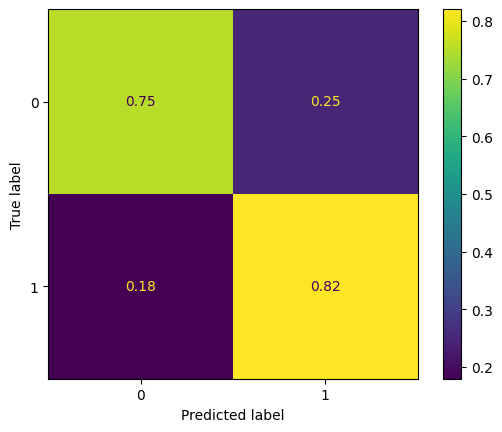

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
cc.score(X_test,y_test)

0.7863247863247863

In [ ]:
Z = [[35,70,82],[3,40,67]]

In [ ]:
cc.predict(Z)

array(['Pass', 'Fail'], dtype=object)